In [47]:
import numpy as np
import netCDF4 as nc
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d

In [2]:
#ds = xr.open_dataset('data_lidar.nc')

In [3]:
#ds

<xarray.Dataset>
Dimensions:                            (time: 143, height: 333)
Coordinates:
  * height                             (height) float32 14.1 42.29 ... 9.373e+03
  * time                               (time) float32 0.03556 0.2022 ... 23.96
Data variables: (12/33)
    CN                                 (time, height) float32 ...
    RMSE                               (time, height) float32 ...
    R_squared                          (time, height) float32 ...
    altitude                           float32 ...
    bandwidth                          float32 ...
    divergence                         float32 ...
    ...                                 ...
    wind_direction                     (time, height) float32 ...
    wind_direction_error               (time, height) float32 ...
    wind_direction_error_instrumental  (time, height) float32 ...
    wind_speed                         (time, height) float32 ...
    wind_speed_error                   (time, height) float32 ...
    wind_speed_error_instrumental      (time, height) float32 ...
Attributes:
    Conventions:  CF-1.0
    system:       HALO Doppler lidar
    location:     Warsaw, Poland
    source:       Warsaw 1.5 micron Doppler lidar
    institution:  University of Warsaw
    title:        HALO Doppler lidar
    day:          23.0
    month:        12.0
    year:         2021.0
    history:      2022-05-07 09:05:22 - Created by Pablo Ortiz-Amezcua <pablo...

In [4]:
#t = ds.variables['time'][:]
#h = ds.variables['height'][:]
#u = ds.variables['u'][:]
#v = ds.variables['v'][:]
#w = ds.variables['w'][:]
#ws = ds.variables['wind_speed'][:]
#wd = ds.variables['wind_direction'][:]
#ms = ds.variables['mean_snr'][:]
#rs = ds.variables['R_squared'][:]

In [19]:
#t[125]

<xarray.Variable ()>
array(21.082638, dtype=float32)
Attributes:
    long_name:  Decimal hours UTC
    units:      Hours UTC
    axis:       T

In [23]:
#h[250]

<xarray.Variable ()>
array(7061.79, dtype=float32)
Attributes:
    long_name:  Height above ground
    units:      m
    comment:    This variable is range from lidar * sin(elevation)
    axis:       Z

In [5]:
#df = ds.to_dataframe()

In [10]:
#df.head(120)

CN          RMSE  R_squared  altitude   bandwidth  \
time     height                                                            
0.035556 14.095389    1.0  1.004422e-04   0.995608     112.0  50000000.0   
         42.286167    1.0  5.700239e-08   0.999990     112.0  50000000.0   
         70.476944    1.0  1.417167e-04   0.993510     112.0  50000000.0   
         98.667725    1.0  4.333200e-06   0.997622     112.0  50000000.0   
         126.858505   1.0  8.674470e-02   0.998134     112.0  50000000.0   
...                   ...           ...        ...       ...         ...   
         3256.034912  1.0  4.226558e-01   0.978595     112.0  50000000.0   
         3284.225830  1.0  4.772175e-01   0.973005     112.0  50000000.0   
         3312.416504  1.0  1.848993e+00   0.447861     112.0  50000000.0   
         3340.607178  1.0  8.432451e-01   0.880749     112.0  50000000.0   
         3368.798096  1.0  1.902192e+00   0.538629     112.0  50000000.0   

                      divergence  elevation  focus   latitude  lens_diameter  \
time     height                                                                
0.035556 14.095389      0.000033       70.0    inf  52.210999           0.06   
         42.286167      0.000033       70.0    inf  52.210999           0.06   
         70.476944      0.000033       70.0    inf  52.210999           0.06   
         98.667725      0.000033       70.0    inf  52.210999           0.06   
         126.858505     0.000033       70.0    inf  52.210999           0.06   
...                          ...        ...    ...        ...            ...   
         3256.034912    0.000033       70.0    inf  52.210999           0.06   
         3284.225830    0.000033       70.0    inf  52.210999           0.06   
         3312.416504    0.000033       70.0    inf  52.210999           0.06   
         3340.607178    0.000033       70.0    inf  52.210999           0.06   
         3368.798096    0.000033       70.0    inf  52.210999           0.06   

                      ...         w   w_error  w_error_instrumental  \
time     height       ...                                             
0.035556 14.095389    ...  0.162686  0.041271              0.025591   
         42.286167    ... -3.131866  0.037570              0.025249   
         70.476944    ...  7.555077  2.270897              0.048684   
         98.667725    ...  0.210140  0.046827              0.047613   
         126.858505   ...  0.176254  0.037376              0.059977   
...                   ...       ...       ...                   ...   
         3256.034912  ...  6.053549  3.312757              0.261593   
         3284.225830  ...  3.863976  2.813558              0.315586   
         3312.416504  ...  0.728714  4.356966              0.253993   
         3340.607178  ... -2.731895  3.736406              0.238407   
         3368.798096  ...  0.481283  2.967092              0.380423   

                      wavelength  wind_direction  wind_direction_error  \
time     height                                                          
0.035556 14.095389      0.000002      319.201080              1.349760   
         42.286167      0.000002       96.999748              0.494552   
         70.476944      0.000002      273.171722              0.454000   
         98.667725      0.000002      221.037445              0.043344   
         126.858505     0.000002      225.809738              0.024865   
...                          ...             ...                   ...   
         3256.034912    0.000002      129.276535              0.382981   
         3284.225830    0.000002      159.397003              1.263834   
         3312.416504    0.000002       50.643593              2.160112   
         3340.607178    0.000002       30.681181              0.761788   
         3368.798096    0.000002      192.210724              0.372419   

                      wind_direction_error_instrumental  wind_speed  \
time     height                    

In [48]:
fh = "data_lidar.nc"
ds = nc.Dataset(fh)

In [49]:
t = ds.variables['time'][:]
h = ds.variables['height'][:]
u = ds.variables['u'][:]
v = ds.variables['v'][:]
w = ds.variables['w'][:]
ws = ds.variables['wind_speed'][:]
wd = ds.variables['wind_direction'][:]
ms = ds.variables['mean_snr'][:]
rs = ds.variables['R_squared'][:]

In [50]:
u[ms < 1.006] = math.nan
v[ms < 1.006] = math.nan
w[ms < 1.006] = math.nan
ws[ms < 1.006] = math.nan
wd[ms < 1.006] = math.nan

In [51]:
u[rs < 0.95] = math.nan
v[rs < 0.95] = math.nan
w[rs < 0.95] = math.nan
ws[rs < 0.95]=math.nan
wd[rs < 0.95]=math.nan

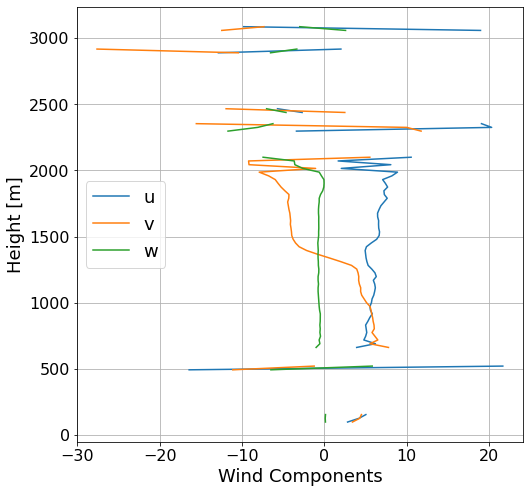

In [102]:
plt.plot(u[1,:],h, label='u')
plt.plot(v[1,:],h, label='v')
plt.plot(w[1,:],h, label='w')
#plt.title('Wind Vectors vs Height', fontsize=16, pad=10)
plt.rcParams["figure.figsize"] = (8,8)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.ylabel('Height [m]', fontsize=18)
plt.xlabel('Wind Components', fontsize=18)
plt.legend(loc='center left',prop={'size': 18})
plt.grid()

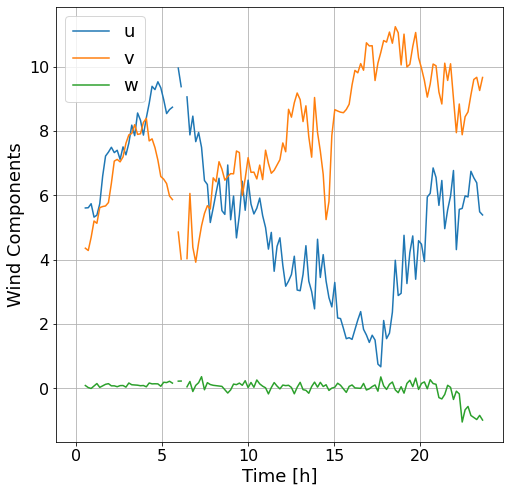

In [7]:
#for time vs wind
plt.plot(t,u[:,10], label = 'u')
plt.plot(t,v[:,10], label = 'v')
plt.plot(t,w[:,10], label = 'w')
#plt.title('Time vs Wind Vectors', fontsize=16, pad=10)
plt.rcParams["figure.figsize"] = (8,8)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.ylabel('Wind Components', fontsize=18)
plt.xlabel('Time [h]', fontsize=18)
plt.legend(loc='upper left',prop={'size': 18})
plt.grid()

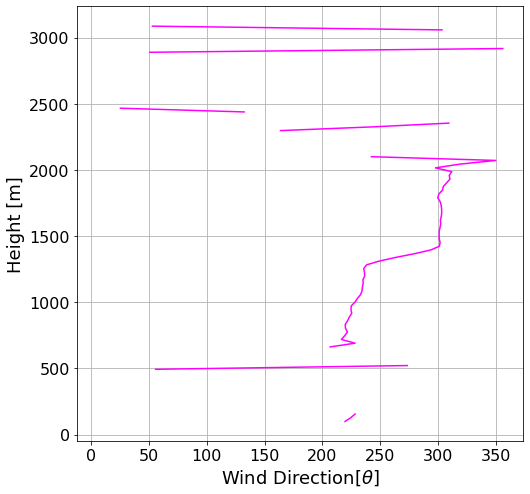

In [100]:
plt.plot(wd[1,:],h, color='magenta')
#plt.plot(v[1,:],h, label='v')
#plt.plot(w[1,:],h, label='w')
#plt.title('Wind Direction vs Height', fontsize=16, pad=10)
plt.rcParams["figure.figsize"] = (8,8)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.ylabel('Height [m]', fontsize=18)
plt.xlabel('Wind Direction' r'[$\theta$]', fontsize=18)
#plt.legend(loc='center left',prop={'size': 18})
plt.grid()

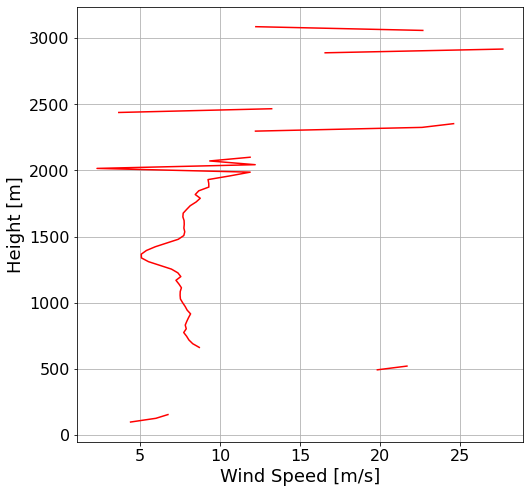

In [107]:
plt.plot(ws[1,:],h, label='wind direction',color='red')
#plt.plot(v[1,:],h, label='v')
#plt.plot(w[1,:],h, label='w')
#plt.title('Wind Vectors vs Height', fontsize=16, pad=10)
plt.rcParams["figure.figsize"] = (8,8)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.ylabel('Height [m]', fontsize=18)
plt.xlabel('Wind Speed [m/s]', fontsize=18)
#plt.legend(loc='center right',prop={'size': 18})
plt.grid()

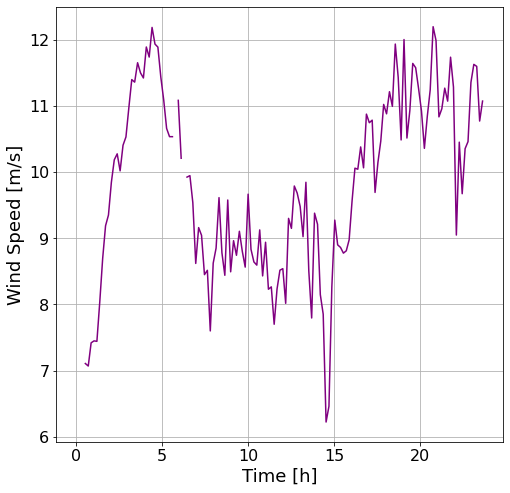

In [9]:
#for time vs wind
plt.plot(t,ws[:,10],color='purple')
#plt.plot(t,v[:,10], label = 'v')
#plt.plot(t,w[:,10], label = 'w')
#plt.title('Time vs Wind Vectors', fontsize=16, pad=10)
plt.rcParams["figure.figsize"] = (8,8)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.ylabel('Wind Speed [m/s]', fontsize=18)
plt.xlabel('Time [h]', fontsize=18)
#plt.legend(loc='upper left',prop={'size': 18})
plt.grid()

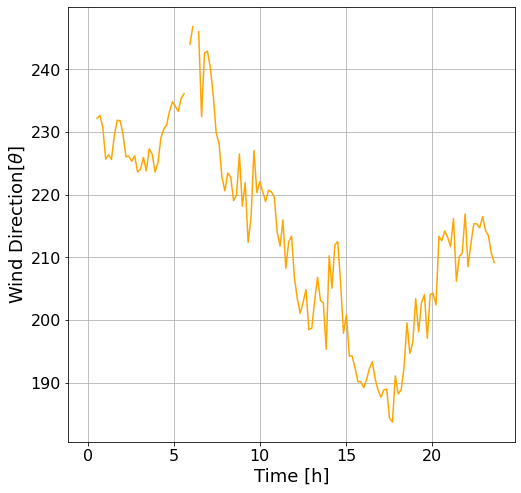

In [10]:
#for time vs wind
plt.plot(t,wd[:,10],color='orange')
#plt.plot(t,v[:,10], label = 'v')
#plt.plot(t,w[:,10], label = 'w')
#plt.title('Time vs Wind Vectors', fontsize=16, pad=10)
plt.rcParams["figure.figsize"] = (8,8)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
#plt.ylabel('Wind Direction' , fontsize=18)
plt.ylabel('Wind Direction' r'[$\theta$]',fontsize=18)
plt.xlabel('Time [h]', fontsize=18)
#plt.legend(loc='upper left',prop={'size': 18})
plt.grid()

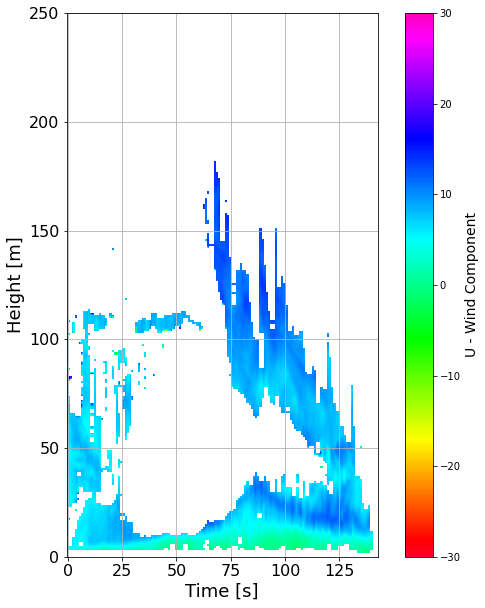

In [109]:
#im = plt.imshow(data, cmap="copper")

#cbar = plt.colorbar(im)
#cbar.set_label("Colorbar")

im = plt.imshow(u.transpose(),origin='lower',cmap='gist_rainbow',vmin = -30, vmax =30)
cbar = plt.colorbar(im)
#plt.ylim(0, 250)
cbar.set_label('U - Wind Component',size=14)
plt.ylim(0, 250)
#plt.xlim(60,90,30)
#plt.title('Time vs Height for Wind Component - u', fontsize=16, pad=10)
plt.rcParams["figure.figsize"] = (10,10)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.ylabel('Height [m]', fontsize=18)
plt.xlabel('Time [s]', fontsize=18)
plt.grid()

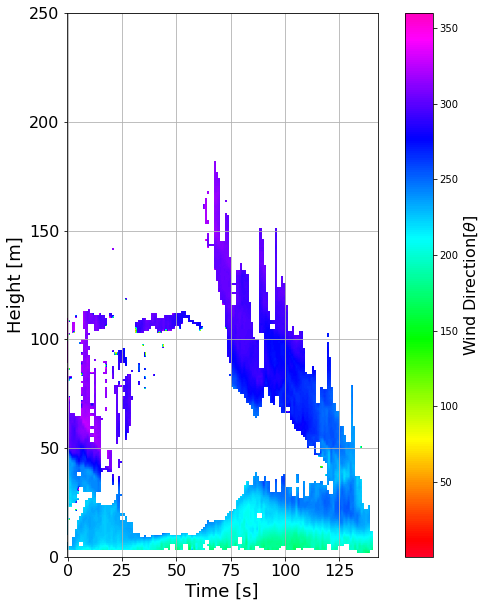

In [105]:
im = plt.imshow(wd.transpose(),origin='lower',cmap='gist_rainbow')
cbar = plt.colorbar(im)
cbar.set_label('Wind Direction'r'[$\theta$]',size=16)
plt.ylim(0, 250)
#plt.xlim(60,90,30)
#plt.title('Time vs Height for Wind Direction', fontsize=16, pad=10)
plt.rcParams["figure.figsize"] = (10,10)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.ylabel('Height [m]', fontsize=18)
plt.xlabel('Time [s]', fontsize=18)
plt.grid()

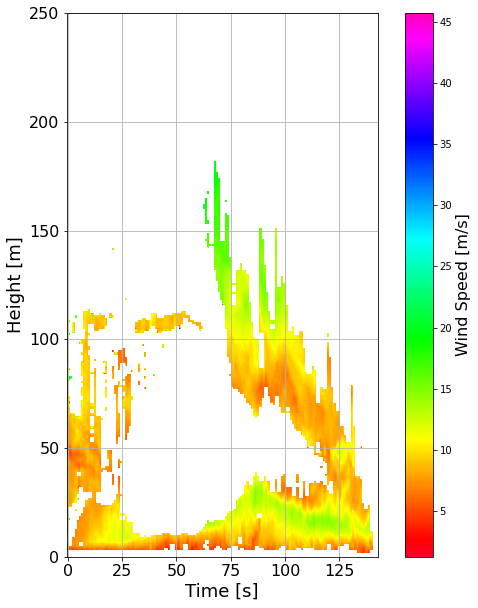

In [97]:
im = plt.imshow(ws.transpose(),origin='lower',cmap='gist_rainbow')
cbar = plt.colorbar(im)
cbar.set_label('Wind Speed [m/s]',size=16)
plt.ylim(0, 250)
#plt.xlim(60,90,30)
#plt.title('Time vs Height for Wind Direction', fontsize=16, pad=10)
plt.rcParams["figure.figsize"] = (10,10)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.ylabel('Height [m]', fontsize=18)
plt.xlabel('Time [s]', fontsize=18)
plt.grid()

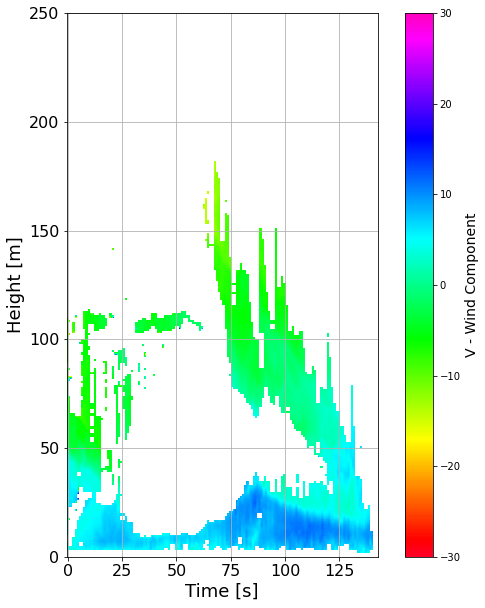

In [60]:

im = plt.imshow(v.transpose(),origin='lower',cmap='gist_rainbow',vmin = -30, vmax =30)
cbar = plt.colorbar(im)
cbar.set_label('V - Wind Component',size=14)
plt.ylim(0, 250)
#plt.xlim(60,90,30)
#plt.title('Time vs Height for Wind Vector - v', fontsize=16, pad=10)
plt.rcParams["figure.figsize"] = (10,10)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.ylabel('Height [m]', fontsize=18)
plt.xlabel('Time [s]', fontsize=18)
plt.grid()

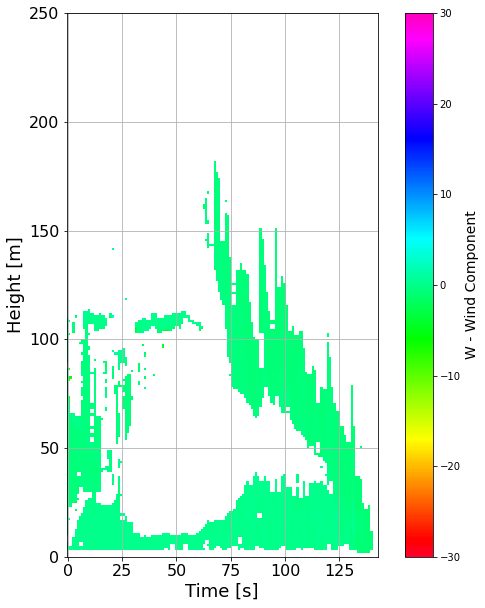

In [110]:

im = plt.imshow(w.transpose(),origin='lower',cmap='gist_rainbow',vmin = -30, vmax =30)
#im = plt.imshow(w.transpose(),origin='lower',cmap='gist_rainbow')
#plt.ylim(-30, 30)
cbar = plt.colorbar(im)
cbar.set_label('W - Wind Component',size=14)
plt.ylim(0, 250)
#plt.xlim(60,90,30)
#plt.title('Time vs Height for Wind Vector - w', fontsize=16, pad=10)
plt.rcParams["figure.figsize"] = (10,10)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.ylabel('Height [m]', fontsize=18)
plt.xlabel('Time [s]', fontsize=18)
plt.grid()

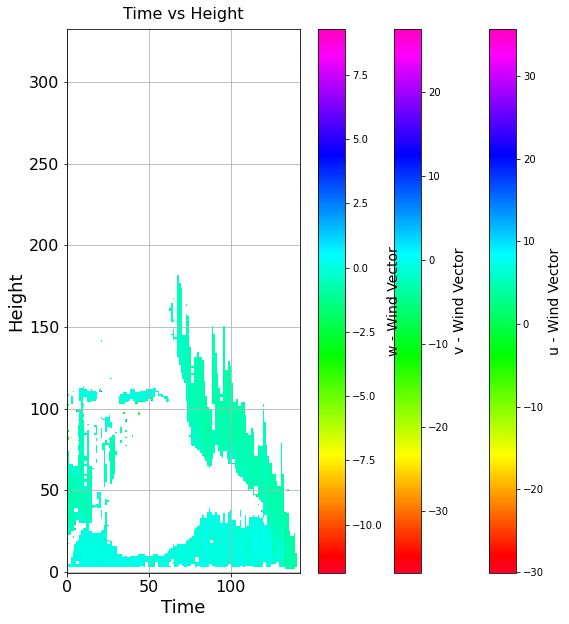

In [42]:
im1 = plt.imshow(u.transpose(),origin='lower',cmap='gist_rainbow',label='u')
cbar1 = plt.colorbar(im1)
cbar1.set_label('u - Wind Vector',size=14)

im2 = plt.imshow(v.transpose(),origin='lower',cmap='gist_rainbow',label='v')
cbar2 = plt.colorbar(im2)
cbar2.set_label('v - Wind Vector',size=14)

im3 = plt.imshow(w.transpose(),origin='lower',cmap='gist_rainbow',label='w')
cbar3 = plt.colorbar(im3)
cbar3.set_label('w - Wind Vector',size=14)
#plt.ylim(0, 250)

#plt.xlim(60,90,30)
plt.title('Time vs Height', fontsize=16, pad=10)
plt.rcParams["figure.figsize"] = (12,12)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.ylabel('Height', fontsize=18)
plt.xlabel('Time', fontsize=18)
#plt.legend(loc='upper left',prop={'size': 18})
plt.grid()